# Setup Tensorflow 2.0

In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 450kB 50.9MB/s 
     |████████████████████████████████| 3.8MB 49.7MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [119]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Fetch data from kaggle API

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [4]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 78% 15.0M/19.3M [00:00<00:00, 32.7MB/s]
100% 19.3M/19.3M [00:00<00:00, 39.4MB/s]
 71% 65.0M/92.0M [00:03<00:01, 19.1MB/s]
100% 92.0M/92.0M [00:03<00:00, 29.9MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 6.70MB/s]
 96% 74.0M/77.3M [00:01<00:00, 52.6MB/s]
100% 77.3M/77.3M [00:01<00:00, 57.0MB/s]
 92% 89.0M/96.6M [00:02<00:00, 41.4MB/s]
100% 96.6M/96.6M [00:02<00:00, 34.7MB/s]


# Data setup

In [0]:
import pandas as pd
data = pd.read_csv('/content/icml_face_data.csv.zip', compression='zip')

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
import random

In [11]:
data.head(10)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,Training,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,Training,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,Training,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,Training,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,Training,255 254 255 254 254 179 122 107 95 124 149 150...


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
sns.set()

In [0]:
g1 = data.groupby(["emotion"]).count()

In [13]:
g1

,Usage,pixels
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


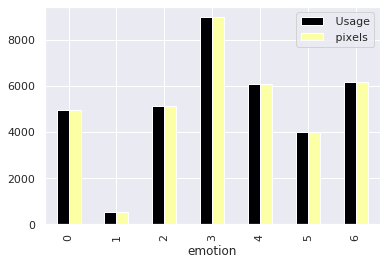

In [125]:
my_plot = g1.plot(kind='bar',cmap='inferno')


The emotion with label 1, is highly underrepresented. It is important to upsample this on the training set, to allow for the neural network to approximate the underlying representation better.

In [14]:
data.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [15]:
data.shape

(35887, 3)

In [16]:
data.loc[data[" Usage"] == "Training"].head(5)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [0]:
def string_to_int_array(item):
    return [int(p) for p in item.split()]

In [0]:
def process_dataframe(data):
  X = [string_to_int_array(item) for item in data.iloc[:, 2].values]
  X = np.array(X) / 255.0
  y = np.array(data.iloc[:, 0].values)
  y = y.astype(np.float32, copy=False)
    
  return X, y

In [0]:
def data_augmentation_process(data):
    not_class1 = data.loc[data['emotion'] != 1]
    class1 = data.loc[data['emotion'] == 1]
    class1_aug = class1
    # This is done to handle the class imbalance for emotion 1 which has only ~500 pics
    for i in range(11):
        class1_aug = class1_aug.append(class1)
    complete_training_set = not_class1.append(class1_aug)
    return process_dataframe(complete_training_set)

In [0]:
train_aug_X, train_aug_y = data_augmentation_process(data.loc[data[' Usage'] == 'Training'])
validate_X, validate_y = process_dataframe(data.loc[data[' Usage'] == 'PublicTest'])
test_X, test_y = process_dataframe(data.loc[data[' Usage'] == 'PrivateTest'])

In [93]:
print(len(train_aug_X),len(validate_X),len(test_X))

33505 3589 3589


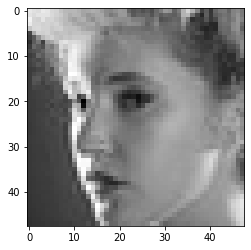

In [94]:
plt.imshow(
    train_X[random.randint(1, train_X.shape[0])].reshape(48, 48),
    cmap='gist_gray')

# Linear Model

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(512,activation=tf.nn.relu),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [148]:
history = model.fit(train_aug_X,train_aug_y,epochs=10)

Train on 33505 samples
Epoch 1/10
33505/33505 [==============================] - 9s 278us/sample - loss: 1.8613 - accuracy: 0.2574
Epoch 2/10
33505/33505 [==============================] - 9s 262us/sample - loss: 1.7522 - accuracy: 0.3252
Epoch 3/10
33505/33505 [==============================] - 9s 260us/sample - loss: 1.6958 - accuracy: 0.3523
Epoch 4/10
33505/33505 [==============================] - 9s 262us/sample - loss: 1.6427 - accuracy: 0.3765
Epoch 5/10
33505/33505 [==============================] - 9s 263us/sample - loss: 1.6002 - accuracy: 0.3898
Epoch 6/10
33505/33505 [==============================] - 9s 261us/sample - loss: 1.5634 - accuracy: 0.4055
Epoch 7/10
33505/33505 [==============================] - 9s 261us/sample - loss: 1.5313 - accuracy: 0.4187
Epoch 8/10
33505/33505 [==============================] - 9s 258us/sample - loss: 1.5033 - accuracy: 0.4274
Epoch 9/10
33505/33505 [==============================] - 9s 262us/sample - loss: 1.4811 - accuracy: 0.4336
Epoch

In [149]:
history.history['accuracy']

[0.25739443,
 0.3252052,
 0.35230562,
 0.37648112,
 0.38976273,
 0.40546188,
 0.41874346,
 0.42736906,
 0.43360692,
 0.44327712]

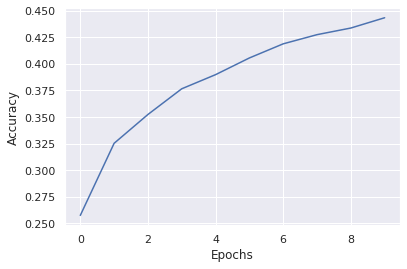

In [151]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("linear.png")
plt.show()

In [152]:
model.evaluate(validate_X, validate_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.6305460353919343, 0.3507941]

In [153]:
model.evaluate(test_X,test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.645537255201608, 0.3530231]

# Convolution Model

In [0]:
modelCNN = keras.Sequential([
                          keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(48,48,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(input_shape=()),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
modelCNN.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_aug_X2d = train_aug_X.reshape(-1,48,48,1,)

In [157]:
train_aug_X2d.shape

(33505, 48, 48, 1)

In [158]:
historyCNN = modelCNN.fit(train_aug_X2d,train_aug_y,epochs=10)

Train on 33505 samples
Epoch 1/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 1.6300 - accuracy: 0.3785
Epoch 2/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 1.2512 - accuracy: 0.5271
Epoch 3/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 1.0683 - accuracy: 0.5935
Epoch 4/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.9519 - accuracy: 0.6398
Epoch 5/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.8489 - accuracy: 0.6828
Epoch 6/10
33505/33505 [==============================] - 104s 3ms/sample - loss: 0.7397 - accuracy: 0.7250
Epoch 7/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.6293 - accuracy: 0.7706
Epoch 8/10
33505/33505 [==============================] - 105s 3ms/sample - loss: 0.5200 - accuracy: 0.8122
Epoch 9/10
33505/33505 [==============================] - 106s 3ms/sample - loss: 0.4176 - accuracy: 0.8496
Epoch

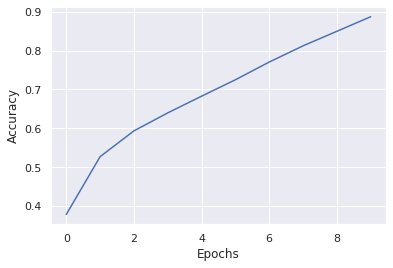

In [159]:
plt.plot(historyCNN.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("convnet_result_plot.png")
plt.show()

In [0]:
validate_X2d = validate_X.reshape(-1,48,48,1,)

In [161]:
modelCNN.evaluate(validate_X2d, validate_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.208908376038722, 0.5143494]

In [0]:
test_X2d = test_X.reshape(-1,48,48,1,)

In [163]:
modelCNN.evaluate(test_X2d, test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.141335570137957, 0.52047926]